In [1]:
##  Import all needed libraries
import os
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##  Function will create spectrogram image from a '.wav' file
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = 8192, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [3]:
##  Function to save spectrogram image and save it locally
def create_image_file(s, name):
  librosa.display.specshow(s)
  plt.savefig(name, bbox_inches='tight', transparent=True, pad_inches=0.0 )



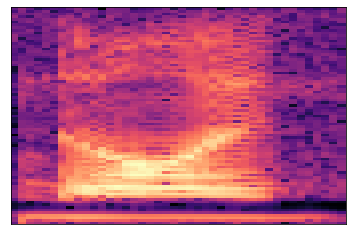

In [4]:
## This will go through a directory to evaluate each file in each subdirectory.
## We used this to step through the dataset (which consisted of '.wav' files) and
## create the spectrogram image

for subdir, dirs, files in os.walk(r'**add location where .wav are held**'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".wav"):
      Base=os.path.basename(filepath)
      file_name = os.path.splitext(Base)[0]
      signal, sample_rate = librosa.load(filepath, sr=None)
      sgram = spectrogram(signal, sample_rate)
      spec_image = "sImage" + file_name + ".png"
      create_image_file (sgram, spec_image)

In [ ]:
##  Spedcialty function that can be used w/ Google Colab to zip and download files once 
##  the have been created

!zip -r '**add location where spectrograms are held**'/file.zip /content #creates zip using folder your spectographs are in, which should be in this location anyway
from google.colab import files
files.download("**add location where spectrograms are held**"/file.zip)

# New Section



# New Section